# Question 1

In [104]:
import pandas as pd
import numpy as np
import scipy.stats as sp 
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('dj5e_index_constituent_prices.csv')
#df.dropna()

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date',ascending=True)
start_date = '2019-01-01'
end_date = '2023-01-01'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
#index = ['AMZN','AMGN','AXP','BA','CAT','CSCO','CVX','GS','HD','HON','IBM','INTC','JNJ','KO','JPM','MCD','MMM','MRK','MSFT','NKE','PG','TRV','UNH','CRM','VZ','V','WMT','DIS','DOW']
df['daily_returns'] = (df['^W1DOW_close'] - df['^W1DOW_close'].shift(1))/df['^W1DOW_close'].shift(1)
df['daily_returns'] = df['daily_returns'].dropna()
print(df['daily_returns'])

200          NaN
201    -0.015271
202    -0.004626
203     0.026215
204     0.006183
          ...   
1203    0.009782
1204    0.000920
1205    0.007433
1206    0.002473
1207   -0.008957
Name: daily_returns, Length: 1008, dtype: float64


200          NaN
201    -0.015271
202    -0.004626
203     0.026215
204     0.006183
          ...   
1203    0.009782
1204    0.000920
1205    0.007433
1206    0.002473
1207   -0.008957
Name: daily_returns, Length: 1008, dtype: float64


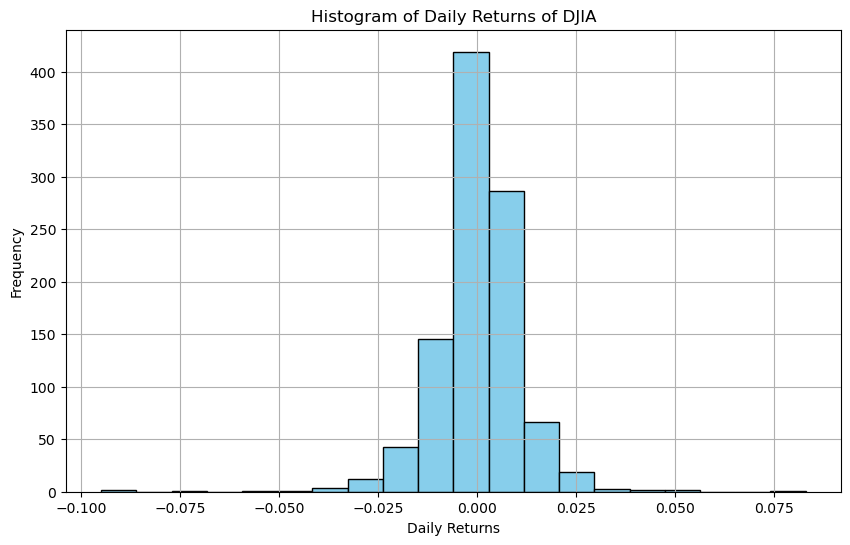

In [106]:
print(df['daily_returns'])
plt.figure(figsize=(10, 6))
plt.hist(df['daily_returns'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Returns of DJIA')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Box-Plot of Daily Returns of DJIA'}, xlabel='daily_returns'>

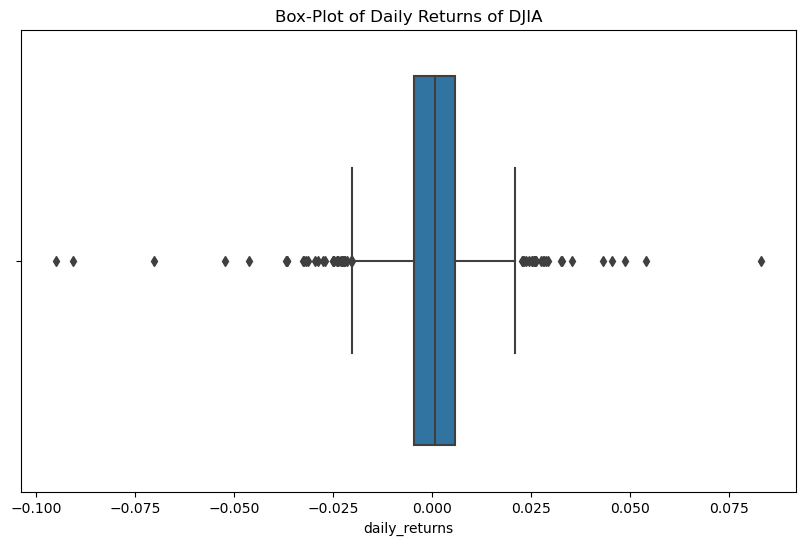

In [107]:
plt.figure(figsize= (10,6))
plt.title('Box-Plot of Daily Returns of DJIA')
plt.xlabel('Daily Return')
sns.boxplot(x = df['daily_returns'])



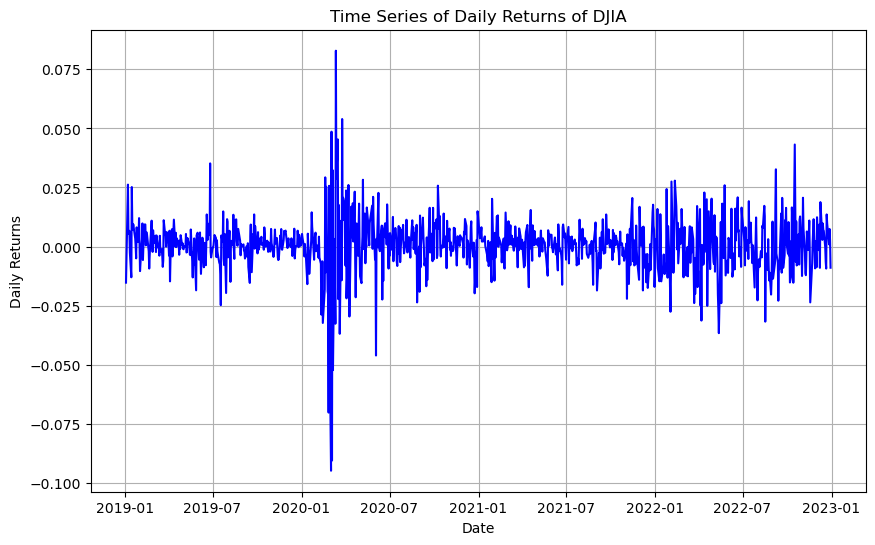

In [108]:
plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['daily_returns'], color='blue')
plt.title('Time Series of Daily Returns of DJIA')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.show()

In [109]:
df['mdate'] = df['Date'].dt.to_period("M")
df['ret_1'] = df['daily_returns'] +1


In [110]:
# For each stock and month, we have to multiply and then deduct one at the end.
# This calls again for a grouping variable, this time the group is symbol and mdate . Since these are two variables, it 
# will take a python list

In [111]:
group = df.groupby(['mdate'])
df['mret'] = group['ret_1'].transform(np.product) -1
dj_monthly_returns = df.drop_duplicates(subset=['mdate'],keep='last')
print(dj_monthly_returns['mdate'])

220     2019-01
239     2019-02
260     2019-03
281     2019-04
303     2019-05
323     2019-06
345     2019-07
367     2019-08
387     2019-09
410     2019-10
430     2019-11
451     2019-12
472     2020-01
491     2020-02
513     2020-03
534     2020-04
554     2020-05
576     2020-06
598     2020-07
619     2020-08
640     2020-09
662     2020-10
682     2020-11
704     2020-12
723     2021-01
742     2021-02
765     2021-03
786     2021-04
806     2021-05
828     2021-06
849     2021-07
871     2021-08
892     2021-09
913     2021-10
934     2021-11
956     2021-12
976     2022-01
995     2022-02
1018    2022-03
1038    2022-04
1059    2022-05
1080    2022-06
1100    2022-07
1123    2022-08
1144    2022-09
1165    2022-10
1186    2022-11
1207    2022-12
Name: mdate, dtype: period[M]


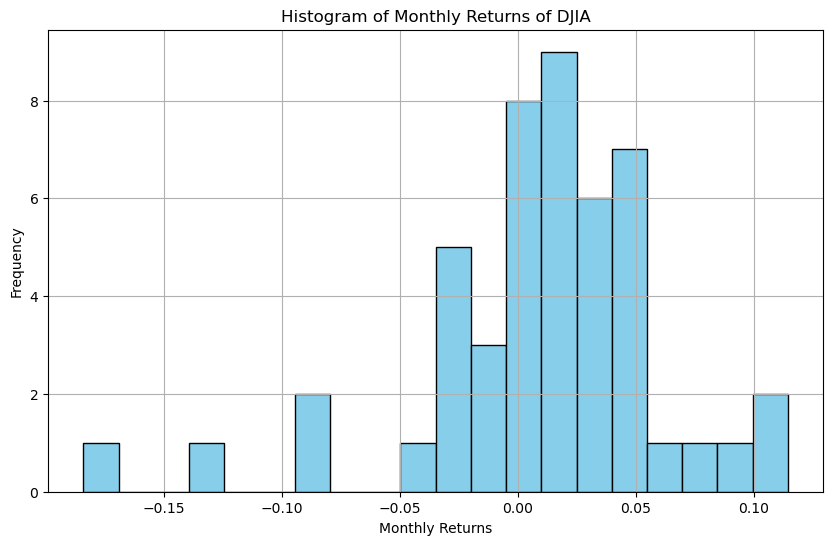

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(dj_monthly_returns['mret'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Monthly Returns of DJIA')
plt.xlabel('Monthly Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Box-Plot of Monthly Returns of DJIA'}, xlabel='mret'>

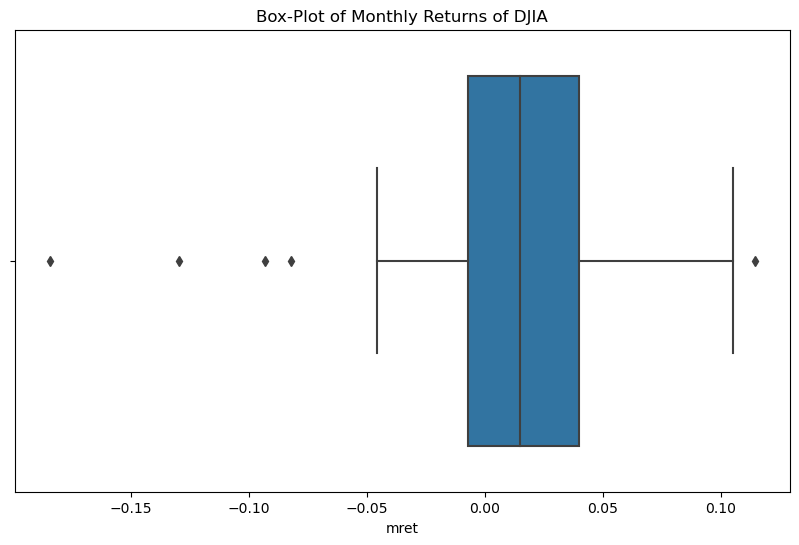

In [113]:
plt.figure(figsize= (10,6))
plt.title('Box-Plot of Monthly Returns of DJIA')
plt.xlabel('Daily Return')
sns.boxplot(x = dj_monthly_returns['mret'])


In [114]:
dj_monthly_returns['mdate'] = dj_monthly_returns['mdate'].dt.to_timestamp()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3132\2166224830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj_monthly_returns['mdate'] = dj_monthly_returns['mdate'].dt.to_timestamp()


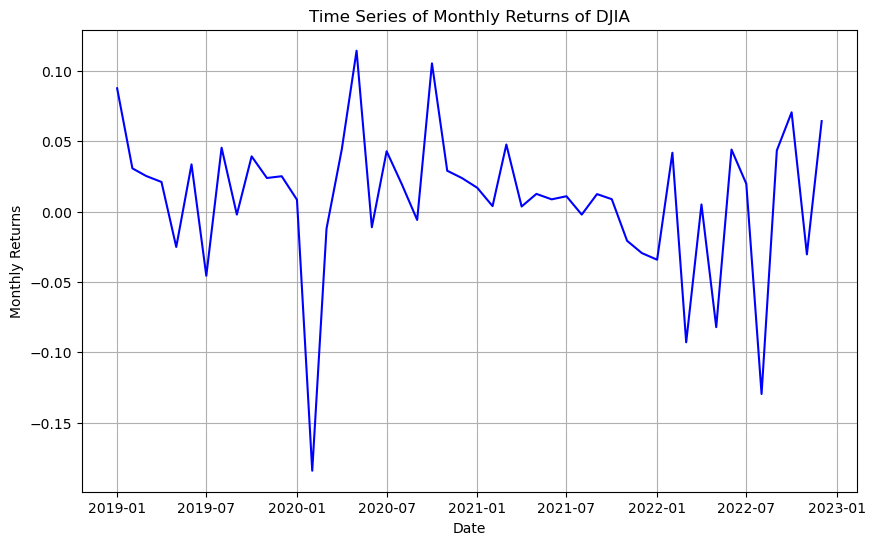

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(dj_monthly_returns['mdate'], dj_monthly_returns['mret'], color='blue')
plt.title('Time Series of Monthly Returns of DJIA')
plt.xlabel('Date')
plt.ylabel('Monthly Returns')
plt.grid(True)
plt.show()

In [116]:

df['cum_returns'] = (1+df['daily_returns']).cumprod() -1
print(df[['Date', '^W1DOW_close', 'cum_returns']])

           Date  ^W1DOW_close  cum_returns
200  2019-01-02        342.48          NaN
201  2019-01-03        337.25    -0.015271
202  2019-01-04        335.69    -0.019826
203  2019-01-07        344.49     0.005869
204  2019-01-08        346.62     0.012088
...         ...           ...          ...
1203 2022-12-23        489.28     0.428638
1204 2022-12-27        489.73     0.429952
1205 2022-12-28        493.37     0.440580
1206 2022-12-29        494.59     0.444143
1207 2022-12-30        490.16     0.431208

[1008 rows x 3 columns]


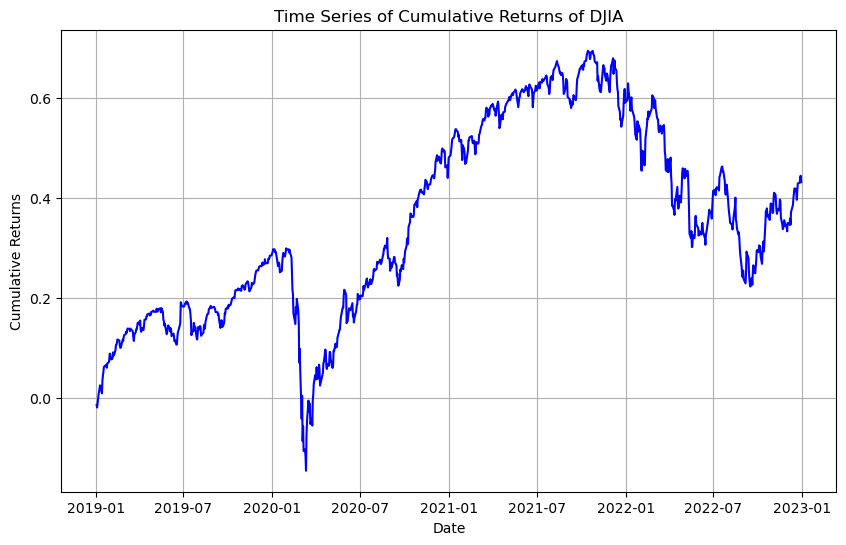

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['cum_returns'], color='blue')
plt.title('Time Series of Cumulative Returns of DJIA')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

# Question 2 (HW4)

In [118]:
data = df['daily_returns']
data = data.dropna()
cumulative_returns = np.cumprod(1+data) -1
cumulative_returns = np.array(cumulative_returns)
#Calculating the VaR for the trimmed data without the identified outliers
var_trimmed = data.quantile(0.05)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 -Q1 # InterQuantile Range

lower_threshold = Q1 - 1.5*IQR
upper_threshold = Q3 + 1.5*IQR
out_bounds = np.sum((data<lower_threshold) | (data>upper_threshold))
print("Total number of return data points which lies outside the criteria of box-plot are =",out_bounds)
print("The total cumulative return with the outlier is = ",cumulative_returns[-1])
print("The VaR value for the trimmed data with the outliers is = ",var_trimmed)


Total number of return data points which lies outside the criteria of box-plot are = 58
The total cumulative return with the outlier is =  0.43120766176126635
The VaR value for the trimmed data with the outliers is =  -0.016609146551227198


In [119]:
out_left = data[data<lower_threshold]
print("Number of return data points lying outside of left tail = ",len(out_left))
out_right = data[data>upper_threshold]
print("Number of return data points lying outside of right tail = ",len(out_right))


Number of return data points lying outside of left tail =  33
Number of return data points lying outside of right tail =  25


In [120]:
left_indices = data[data<lower_threshold].index
data = data.drop(index=left_indices)
right_indices = data[data>upper_threshold].index
data = data.drop(index=right_indices)


In [121]:
cumulative_returns = np.cumprod(1+data) -1
cumulative_returns = np.array(cumulative_returns)
print("The cumulative return without the 58 outliers is = ",cumulative_returns[-1])

The cumulative return without the 58 outliers is =  0.9733796255903675


Without the outliers the cumulative return was 0.9734 while with outliers it was 0.4312 , this shows the how the outliers negatively impacted the returns of dow jones index

In [122]:
#Calculating the VaR for the trimmed data without the identified outliers
var_trimmed = data.quantile(0.05)
print("The VaR value for the trimmed data without the outliers is = ",var_trimmed)

The VaR value for the trimmed data without the outliers is =  -0.012692923132184094


With outliers the Var came out tobe -0.0166091 while without the outliers it came out to be -0.01269

# Question 3

In [123]:
from scipy.stats import kstest
daily_returns = df['daily_returns']
daily_returns = daily_returns.dropna()

#testing for normality of the returns using Kolmogrov-Smirnov Test
kstest_result = kstest(daily_returns,'norm')
print("Kolmogorov-Smirnov test statistic:", kstest_result.statistic)
print("p-value:", kstest_result.pvalue)

Kolmogorov-Smirnov test statistic: 0.4810007387412062
p-value: 7.818745103124462e-215


In [124]:
monthly_returns = dj_monthly_returns['mret']
#testing for normality of the returns using Kolmogrov-Smirnov Test
kstest_result = kstest(monthly_returns,'norm')
print("Kolmogorov-Smirnov test statistic:", kstest_result.statistic)
print("p-value:", kstest_result.pvalue)


Kolmogorov-Smirnov test statistic: 0.45444139823361807
p-value: 1.412395886472879e-09


# Question 4

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

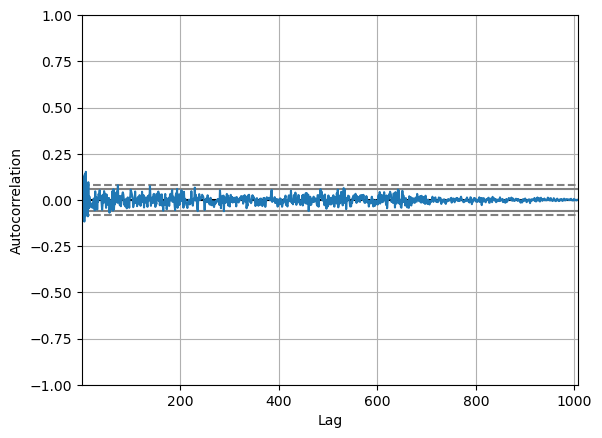

In [125]:
from pandas.plotting import autocorrelation_plot
data = df['daily_returns']
data = data.dropna()
autocorrelation_plot(data)

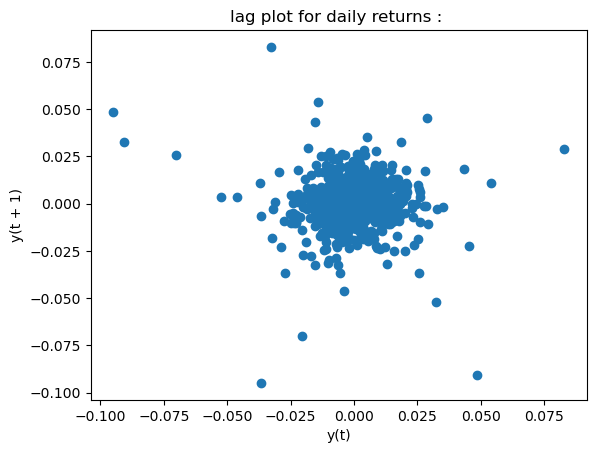

In [126]:
from pandas.plotting import lag_plot
lag_plot(data,lag=1)
plt.title("lag plot for daily returns : ")
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

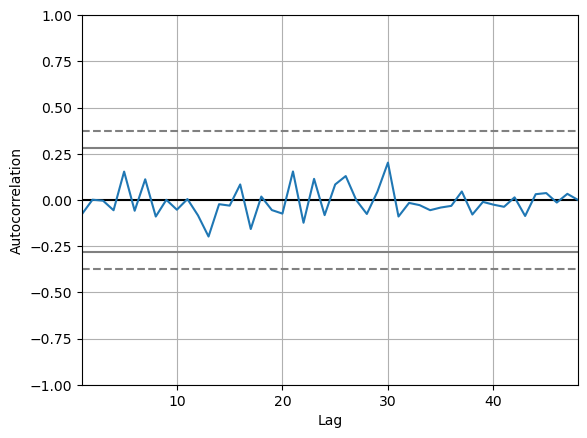

In [127]:
from pandas.plotting import autocorrelation_plot
data_monthly = dj_monthly_returns['mret']
data_monthly = data_monthly.dropna()
autocorrelation_plot(data_monthly)

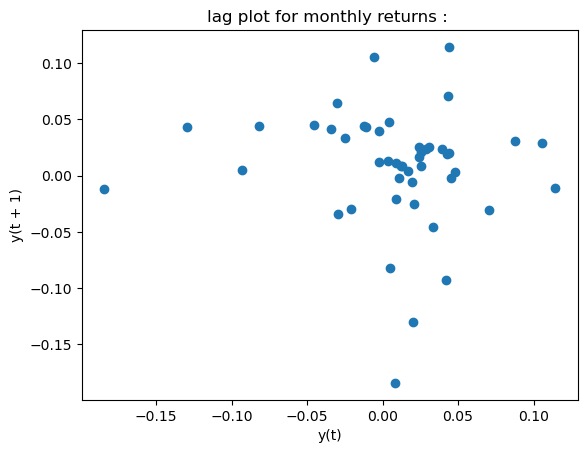

In [128]:
from pandas.plotting import lag_plot
lag_plot(data_monthly,lag=1)
plt.title("lag plot for monthly returns : ")
plt.show()


# Question 5

In [129]:
df_regression = df

In [130]:
from sklearn.linear_model import LinearRegression
columns = list(df_regression.columns)
print(df_regression.columns)
for cols in columns[1:-5]:
    df_regression[cols] = (df_regression[cols] - df_regression[cols].shift(1))/df_regression[cols].shift(1)
print(df_regression)


Index(['Date', '^W1DOW_close', 'MMM_close', 'ABBV_close', 'ALV_close',
       'GOOGL_close', 'AMZN_close', 'AMGN_close', 'ABI.BR_close', 'AAPL_close',
       'BHP_close', 'BA_close', 'BP_close', 'BATS.L_close', 'CVX_close',
       'CSCO_close', 'C_close', 'KO_close', 'DD_close', 'XOM_close',
       'META_close', 'GE_close', 'GSK_close', 'HSBA.L_close', 'INTC_close',
       'IBM_close', 'JNJ_close', 'JPM_close', 'MA_close', 'MCD_close',
       'MRK_close', 'MSFT_close', 'NESN.SW_close', 'NOVN_close', 'NVDA_close',
       'ORCL_close', 'PEP_close', 'PFE_close', 'PM_close', 'PG_close',
       'ROG_close', 'RY_close', 'SMSN.L_close', 'SAN_close', 'SIE.DE_close',
       'TSM_close', 'V_close', '7203.T_close', 'WMT_close', 'DIS_close',
       'daily_returns', 'mdate', 'ret_1', 'mret', 'cum_returns'],
      dtype='object')
           Date  ^W1DOW_close  MMM_close  ABBV_close  ALV_close  GOOGL_close  \
200  2019-01-02           NaN        NaN         NaN        NaN          NaN   
201  2019-01

In [131]:
df_regression = df_regression.drop(200)
df_regression = df_regression.fillna(0)

In [132]:
Y = df_regression['^W1DOW_close']

In [133]:
df_regression = df_regression.drop(columns=['^W1DOW_close', 'daily_returns','mdate','ret_1','mret','cum_returns','Date'])

In [134]:
X = df_regression.values

In [135]:
regression_model = LinearRegression()
regression_model.fit(X,Y)
print("Intercept:", regression_model.intercept_)
print("Coefficient:", regression_model.coef_)

Intercept: 0.0005768482439095238
Coefficient: [-0.04162647  0.02462548  0.01472214 -0.05378694  0.07480102 -0.04376547
 -0.05432909 -0.03706565 -0.01538565  0.00211356  0.02021314 -0.01440302
 -0.02420301  0.04640514  0.00169361  0.00834486  0.01670382 -0.02952078
 -0.01093026  0.00443162 -0.05000312 -0.02965998  0.00311808 -0.02416653
  0.04900668  0.0256791  -0.03477158 -0.09192361 -0.06039676 -0.01209009
  0.05779401 -0.01273469 -0.0050022   0.00509987  0.03579108  0.01466132
  0.0089995  -0.04272162  0.00297714  0.07326845 -0.00511371 -0.02170484
  0.04484588 -0.00784563  0.06947836  0.03572931 -0.04253757  0.04654943]


In [136]:
y_pred = regression_model.predict(X)
residuals = Y - y_pred
for cols in list(df_regression.columns):
    plt.scatter(X[cols],residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
    plt.title('Residuals vs. Independent Variable')
    plt.xlabel(cols)
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
coeff = list(regression_model.coef_)
idx = list(df_regression)
combined = list(zip(idx,coeff))
print(combined)

[('MMM_close', -0.04162646563537461), ('ABBV_close', 0.024625475701573512), ('ALV_close', 0.014722140472797858), ('GOOGL_close', -0.05378693783465815), ('AMZN_close', 0.07480101815653349), ('AMGN_close', -0.04376547116404851), ('ABI.BR_close', -0.05432908672335938), ('AAPL_close', -0.03706565013679959), ('BHP_close', -0.015385649856402062), ('BA_close', 0.002113556929379501), ('BP_close', 0.02021313843790049), ('BATS.L_close', -0.014403020415010053), ('CVX_close', -0.024203013674792256), ('CSCO_close', 0.046405135211922716), ('C_close', 0.0016936114026423733), ('KO_close', 0.008344863750168319), ('DD_close', 0.016703818574702285), ('XOM_close', -0.029520783397979623), ('META_close', -0.010930262570839679), ('GE_close', 0.004431616954324817), ('GSK_close', -0.05000311503065762), ('HSBA.L_close', -0.02965998197099175), ('INTC_close', 0.0031180791649885616), ('IBM_close', -0.02416652968655013), ('JNJ_close', 0.04900668353658187), ('JPM_close', 0.025679101835676524), ('MA_close', -0.034771

In [ ]:
sorted_comb = sorted(combined, key=lambda x:x[1],reverse=True)
print(sorted_comb)

[('AMZN_close', 0.07480101815653349), ('RY_close', 0.07326844898491602), ('V_close', 0.06947836159930447), ('NESN.SW_close', 0.05779400636546913), ('JNJ_close', 0.04900668353658187), ('DIS_close', 0.046549433799398035), ('CSCO_close', 0.046405135211922716), ('SIE.DE_close', 0.044845877778383954), ('PEP_close', 0.03579108092504038), ('7203.T_close', 0.035729307355126146), ('JPM_close', 0.025679101835676524), ('ABBV_close', 0.024625475701573512), ('BP_close', 0.02021313843790049), ('DD_close', 0.016703818574702285), ('ALV_close', 0.014722140472797858), ('PFE_close', 0.014661322911285826), ('PM_close', 0.008999499105116516), ('KO_close', 0.008344863750168319), ('ORCL_close', 0.005099870177774122), ('GE_close', 0.004431616954324817), ('INTC_close', 0.0031180791649885616), ('ROG_close', 0.0029771353625981513), ('BA_close', 0.002113556929379501), ('C_close', 0.0016936114026423733), ('NVDA_close', -0.005002204044181354), ('SMSN.L_close', -0.005113707728688258), ('TSM_close', -0.00784563022003

In [ ]:
print(len(sorted_comb))

48


# OLS analysis

In [ ]:
X = df_regression

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, x).fit()
# alternate syntax: model = sm.ols(formula=’index_price  ̃ interest_rate’, data=df).fit(
predictions = model.predict(x)
print_model = model.summary()
print(print_model)
#print(predictions)

                            OLS Regression Results                            
Dep. Variable:           ^W1DOW_close   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.875
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           0.000375
Time:                        07:19:10   Log-Likelihood:                 3105.3
No. Observations:                1007   AIC:                            -6113.
Df Residuals:                     958   BIC:                            -5872.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.586

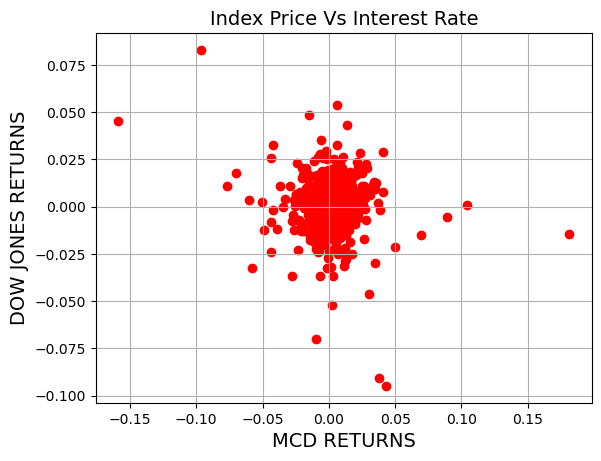

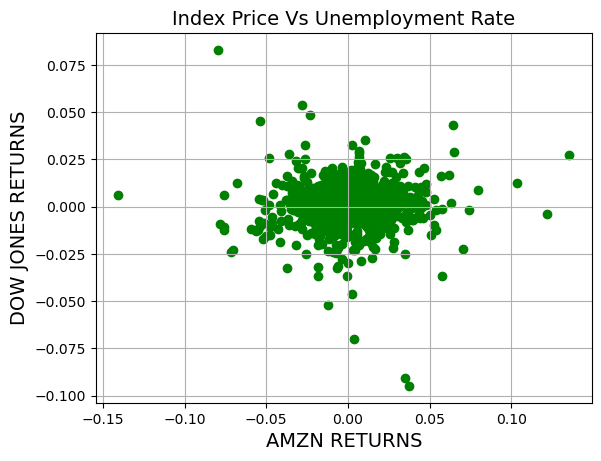

In [ ]:
plt.scatter(df_regression['MCD_close'], Y, color='red')
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('MCD RETURNS', fontsize=14)
plt.ylabel('DOW JONES RETURNS', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_regression['AMZN_close'], Y, color='green')
plt.title('Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('AMZN RETURNS', fontsize=14)
plt.ylabel('DOW JONES RETURNS', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from itertools import combinations
import statsmodels.api as sm

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit regression models with different numbers of predictors
bounds = list(df_regression.columns)

for k in range(1, len(bounds) + 1):
    # Generate all combinations of k predictors
    predictors_combinations = combinations(bounds, k)
    for predictors in predictors_combinations:
        # Fit linear regression model
        X_subset = df_regression[predictors[0]]
        model = sm.OLS(Y, sm.add_constant(X_subset)).fit()
        
        # Calculate AIC and BIC
        aic_values.append(model.aic)
        bic_values.append(model.bic)

# Plot AIC values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(aic_values) + 1), aic_values, marker='o', label='AIC')
plt.xlabel('Number of Predictors')
plt.ylabel('AIC')
plt.title('AIC for Different Numbers of Predictors')
plt.legend()
plt.grid(True)
plt.show()

# Plot BIC values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(bic_values) + 1), bic_values, marker='o', label='BIC')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC')
plt.title('BIC for Different Numbers of Predictors')
plt.legend()
plt.grid(True)
plt.show()
